### This notebook is good

In [1]:
import cartopy
import cmocean
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.colorbar
import netCDF4
import numpy

## net series files

In [2]:
%%time
#300yr OM4files, date 198801 - 200712

#chunk along dim = 'time'
OM4p25 = netCDF4.MFDataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p25/comp/*.nc')
OM4p25z = netCDF4.MFDataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p25z/comp/*.nc')
OM4p5nep = netCDF4.MFDataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5nep/comp/*.nc')
OM4p5mle =netCDF4.MFDataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5mle/comp/*.nc')
OM4p5 = netCDF4.MFDataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5/comp/*.nc')

#Grid files
G25 = netCDF4.Dataset('/work/Nkeh.Boh/SST/NetOMfiles/G25/ocean_hgrid.nc')
G5 = netCDF4.Dataset('/work/Nkeh.Boh/SST/NetOMfiles/G5/ocean_hgrid.nc')
M25 = netCDF4.Dataset('/work/Nkeh.Boh/SST/NetOMfiles/M25/ocean_mask.nc')
M5 = netCDF4.Dataset('/work/Nkeh.Boh/SST/NetOMfiles/M5/ocean_mask.nc')

#WOA files
W25 = netCDF4.Dataset('/work/Nkeh.Boh/SST/NetOMfiles/W25/comp/WOA05_ptemp_salt_monthly.v20141007.nc')
W5 = netCDF4.Dataset('/work/Nkeh.Boh/SST/NetOMfiles/W05/comp/WOA05_ptemp_salt_monthly.v2015.12.03.nc')
# 105GB < T_fileSize <110GB


## Averaging
OM4p25_av = numpy.mean(OM4p25.variables['tos'][:],axis=0)
OM4p5nep_av = numpy.mean(OM4p5nep.variables['tos'][:], axis=0)
OM4p25z_av = numpy.mean(OM4p25z.variables['tos'][:], axis=0)
OM4p5_av = numpy.mean(OM4p5.variables['tos'][:], axis=0)
OM4p5mle_av = numpy.mean(OM4p5mle.variables['tos'][:], axis=0)

W25_av = numpy.mean(W25.variables['ptemp'][:,0], axis=0)
W5_av = numpy.mean(W5.variables['ptemp'][:,0], axis=0)

CPU times: user 5min 54s, sys: 2min 55s, total: 8min 49s
Wall time: 8min 50s


In [3]:
%%time
xq25 = G25.variables['x'][:][::2,::2]
yq25 = G25.variables['y'][:][::2,::2]
a25 = G25.variables['area'][:]; a25 = a25[::2,::2]+a25[1::2,1::2]+a25[1::2,::2]+a25[1::2,::2]
m25 = M25.variables['mask'][:]; a25 = a25*m25
xq5 = G5.variables['x'][:][::2,::2]
yq5 = G5.variables['y'][:][::2,::2]
a5 = G5.variables['area'][:]; a5 = a5[::2,::2]+a5[1::2,1::2]+a5[1::2,::2]+a5[1::2,::2]
m5 = M5.variables['mask'][:]; a5 = a5*m5

CPU times: user 91 ms, sys: 209 ms, total: 300 ms
Wall time: 297 ms


In [4]:
%%time
def stats(ax, area, anomaly, label):
    mn = (anomaly*area).sum()/area.sum()
    sd = numpy.sqrt( ((anomaly-mn)**2*area).sum()/area.sum() )
    rms = numpy.sqrt( (anomaly**2*area).sum()/area.sum() )
    qmn, qmx = anomaly.min(), anomaly.max()
    print(label, 'mean =', mn, 'sd =', sd, 'rms =', rms, 'min =', qmn, 'max =', qmx )
    bb = ax.get_position()
    plt.gcf().text(bb.x0,bb.y1+.01,'mean=%.3f$^\circ$C'%mn, horizontalalignment='left')
    plt.gcf().text(bb.x1,bb.y1+.01,'rms=%.3f$^\circ$C'%rms, horizontalalignment='right')


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


## Plot

OMp25 mean = 0.043998621851836894 sd = 0.5611152232625646 rms = 0.5628376097398516 min = -5.973505655924477 max = 6.228269331190321
OMp5nep mean = 0.04593004057629335 sd = 0.6675890278438884 rms = 0.6691671538925253 min = -6.418900349934898 max = 8.316158125135635
OMp25z mean = 0.008191020920518032 sd = 0.5949026994566409 rms = 0.594959086600867 min = -5.985269978841146 max = 5.486629180908203
OMp5 mean = 0.04928319103598799 sd = 0.623199471639782 rms = 0.6251451156848266 min = -5.082653698391384 max = 8.833644248114693
CPU times: user 24 s, sys: 302 ms, total: 24.3 s
Wall time: 24.5 s


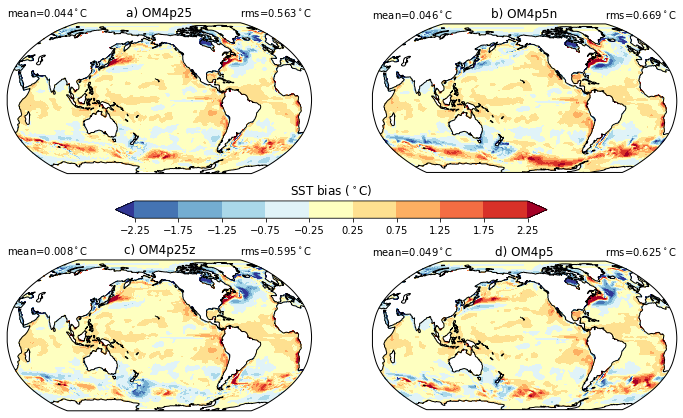

In [5]:
%%time
fig = plt.figure(figsize=(12, 8))
vmin,vmax,ci,cmap = -2.25,2.25,.5,plt.cm.RdYlBu_r
axes = []
cilev = numpy.arange(vmin-ci,vmax+ci*2,ci)
norm = matplotlib.colors.BoundaryNorm(boundaries=cilev, ncolors=cmap.N)

q = OM4p25_av - W25_av
ax = fig.add_subplot(2,2,1,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq25, yq25, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm, vmin=vmin, vmax=vmax)
stats(ax, a25, q, 'OMp25')
ax.coastlines()
axes.append(ax)
plt.title('a) OM4p25')

q = OM4p5nep_av - W5_av
ax = fig.add_subplot(2,2,2,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq5, yq5, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
stats(ax, a5, q, 'OMp5nep')
ax.coastlines()
axes.append(ax)
plt.title('b) OM4p5n')

q = OM4p25z_av - W25_av
ax = fig.add_subplot(2,2,3,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq25, yq25, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
stats(ax, a25, q, 'OMp25z')
ax.coastlines()
axes.append(ax)
plt.title('c) OM4p25z')

# q = OM4p5mle_av - W5_av
# ax = fig.add_subplot(2,2,3,projection=cartopy.crs.Robinson(central_longitude=-155))
# im = ax.pcolormesh(xq5, yq5, q,
#               transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
# stats(ax, a5, q, 'OM4p5mle')
# ax.coastlines()
# axes.append(ax)
# plt.title('c) OM4p25e')

q = OM4p5_av - W5_av
ax = fig.add_subplot(2,2,4,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq5, yq5, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm, vmin=vmin, vmax=vmax)
stats(ax, a5, q, 'OMp5')
ax.coastlines()
axes.append(ax)
plt.title('d) OM4p5')

ax = plt.gcf().add_axes((.25,.5,.5,.03))
cb = matplotlib.colorbar.ColorbarBase(ax=ax, cmap=cmap, norm=norm, boundaries=cilev,
                                      orientation='horizontal', extend='both')
cb.ax.set_title('SST bias ($^\circ$C)')

plt.savefig('sst-bias.png')